Import some libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as sp
import pylab
from wordcloud import WordCloud
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

Direct to the stored strava data from 'get_data.py' and load it into dataframes

In [2]:
data_directory = './data'
segement = 'The_Ouchey_Flat'
location = 'Lausanne'

In [3]:
efforts_athletes_activities = pd.read_csv('{0}/efforts_athletes_activities.{1}.csv'.format(data_directory, segement), index_col=0, sep='\t')

In [4]:
len(efforts_athletes_activities)

4667

How many people ride mission bay drive? And how fast?

In [5]:
m = efforts_athletes_activities.sex == 'M'
f = efforts_athletes_activities.sex == 'F'

In [6]:
f_color = sns.cubehelix_palette(8)[3]
m_color = sns.light_palette((210, 90, 60), input="husl")[4]

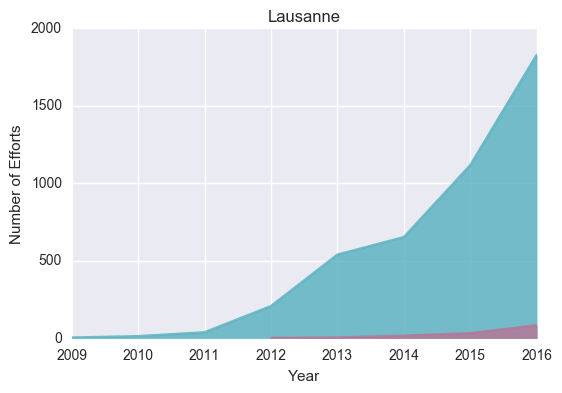

In [63]:
ax = efforts_athletes_activities[m].groupby('year').count().plot(kind='area', color=m_color, alpha=.8, y='athlete_id', label='Number of Efforts', legend=False)
ax = efforts_athletes_activities[f].groupby('year').count().plot(kind='area', color=f_color, alpha=.8, y='athlete_id', label='Number of Efforts', legend=False, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Efforts')
ax.set_title(location)
ax.set_xticklabels(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
plt.savefig('./images/efforts.{0}.png'.format(location))

In [36]:
ax.get_xaxis()

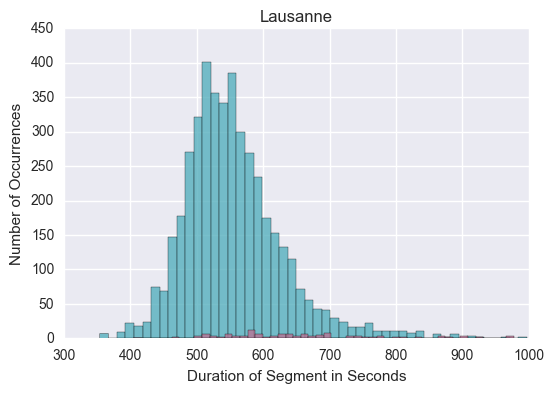

In [50]:
ax = efforts_athletes_activities[m]['moving_time_x'].hist(bins=50, color=m_color, alpha=0.8)
efforts_athletes_activities[f]['moving_time_x'].hist(bins=50, color=f_color, alpha=0.8, ax=ax)
ax.set_xlabel('Duration of Segment in Seconds')
ax.set_ylabel('Number of Occurrences')
ax.set_title(location)
plt.savefig('./images/durations.{0}.png'.format(location))


When do they ride mission bay drive?

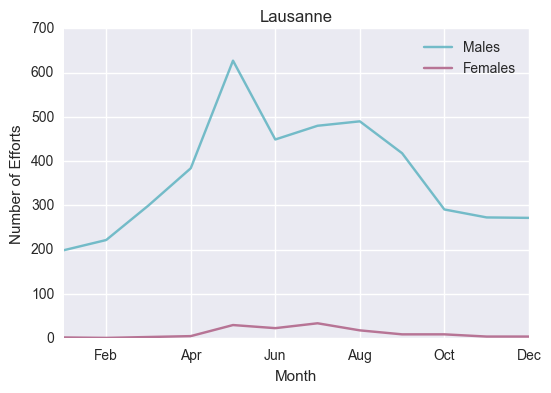

In [51]:
ax = efforts_athletes_activities[efforts_athletes_activities.sex == 'M'].groupby('month').count().plot(y='elapsed_time_x', alpha=0.8, label='Males', c=m_color)
ax = efforts_athletes_activities[efforts_athletes_activities.sex == 'F'].groupby('month').count().plot(y='elapsed_time_x', label='Females', c=f_color, ax=ax)
ax.set_xticklabels(['Jan', 'Feb', 'Apr',  'Jun',  'Aug',  'Oct',  'Dec'])
#plt.ylim(0, 50)
ax.set_title(location)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Efforts')
plt.savefig('./images/count_months.{0}.png'.format(location))


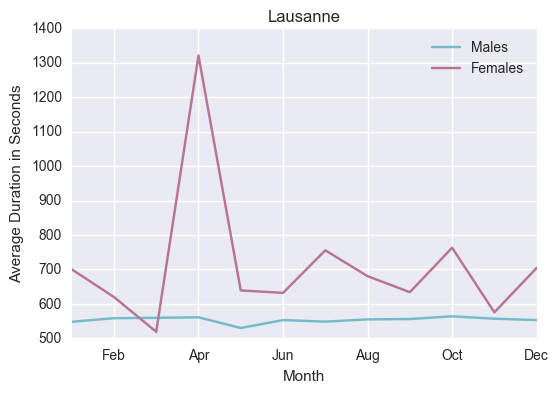

In [52]:
ax = efforts_athletes_activities[efforts_athletes_activities.sex == 'M'].groupby('month').aggregate(np.median).plot(y='elapsed_time_x', alpha=0.8, label='Males', c=m_color)
ax = efforts_athletes_activities[efforts_athletes_activities.sex == 'F'].groupby('month').aggregate(np.median).plot(y='elapsed_time_x', label='Females', c=f_color, ax=ax)
ax.set_xticklabels(['Jan', 'Feb', 'Apr',  'Jun',  'Aug',  'Oct',  'Dec'])
ax.set_title(location)
ax.set_xlabel('Month')
ax.set_ylabel('Average Duration in Seconds')
plt.savefig('./images/duration_months.{0}.png'.format(location))


In [11]:
hour_restriction = (efforts_athletes_activities['hour'] > 4) & (efforts_athletes_activities['hour'] < 21)

In [12]:
weekend_color = sns.color_palette("Set2", 2)[0]
weekday_color = sns.color_palette("Set2", 2)[1]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


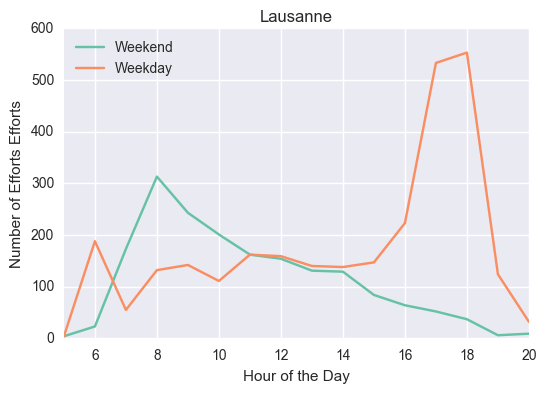

In [53]:
ax = efforts_athletes_activities[hour_restriction][((efforts_athletes_activities['weekday'] == 5)|
                                  (efforts_athletes_activities['weekday'] == 6))].groupby('hour').count().plot(y='moving_time_x', label = "Weekend", color=weekend_color)
ax = efforts_athletes_activities[hour_restriction][((efforts_athletes_activities['weekday'] == 0)|
                                  (efforts_athletes_activities['weekday'] == 1)|
                                  (efforts_athletes_activities['weekday'] == 2)|
                                  (efforts_athletes_activities['weekday'] == 3)|
                                  (efforts_athletes_activities['weekday'] == 4))].groupby('hour').count().plot(y='moving_time_x', label='Weekday', color=weekday_color, ax=ax)
ax.set_title(location)
ax.set_ylabel('Number of Efforts Efforts')
ax.set_xlabel('Hour of the Day')
plt.savefig('./images/count_hour.{0}.png'.format(location))


What factors impact their speed?

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


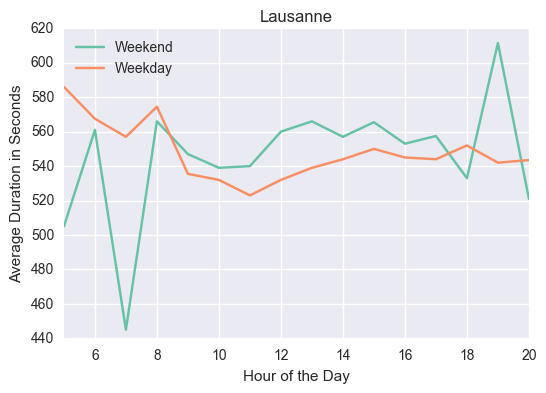

In [56]:
ax = efforts_athletes_activities[hour_restriction][(efforts_athletes_activities['weekday'] == 5)|
                                 (efforts_athletes_activities['weekday'] == 6)].groupby('hour').aggregate(np.median).plot(y='moving_time_x', label = "Weekend", color=weekend_color)
ax = efforts_athletes_activities[hour_restriction][(efforts_athletes_activities['weekday'] == 0)|
                                 (efforts_athletes_activities['weekday'] == 1)|
                                 (efforts_athletes_activities['weekday'] == 2)|
                                 (efforts_athletes_activities['weekday'] == 3)|
                                 (efforts_athletes_activities['weekday'] == 4)].groupby('hour').aggregate(np.median).plot(y='moving_time_x', label='Weekday', color=weekday_color, ax=ax)
ax.set_title(location)
ax.set_ylabel('Average Duration in Seconds')
ax.set_xlabel('Hour of the Day')
plt.savefig('./images/duration_hour.{0}.png'.format(location))


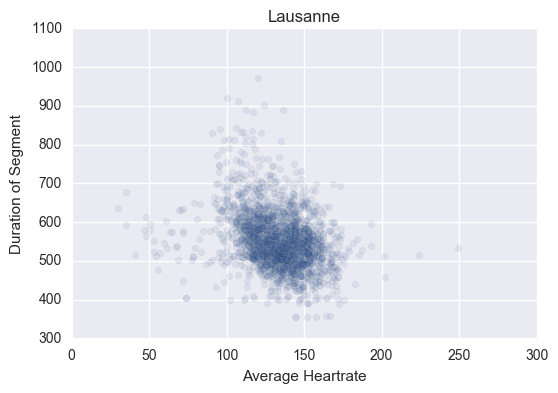

In [15]:
ax = efforts_athletes_activities.plot(x='average_heartrate_x', y='moving_time_x',  alpha=0.1, kind='scatter')
ax.set_title(location)
ax.set_ylabel('Duration of Segment')
ax.set_xlabel('Average Heartrate')

Do males and females name their rides differently?

In [16]:
fast = efforts_athletes_activities.moving_time_x < efforts_athletes_activities.moving_time_x.quantile(.05) 
slow = efforts_athletes_activities.moving_time_x > efforts_athletes_activities.moving_time_x.quantile(.95) 

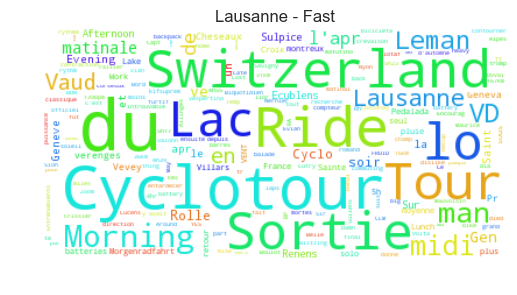

In [54]:
text = " ".join(list(efforts_athletes_activities[fast]['name_y'].astype(str)))
current_palette = sns.color_palette('dark')
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title(location + ' - Fast')
plt.savefig('./images/text_fast.{0}.png'.format(location))


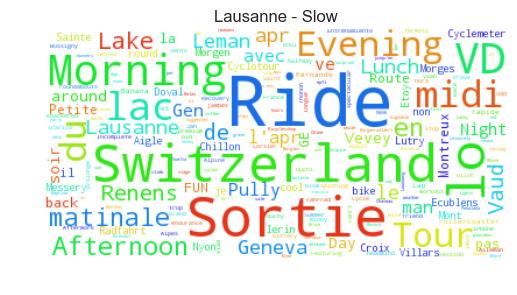

In [55]:
text = " ".join(list(efforts_athletes_activities[slow]['name_y'].astype(str)))
current_palette = sns.color_palette('dark')
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.title(location + ' - Slow')
plt.axis("off")
plt.savefig('./images/text_slow.{0}.png'.format(location))


Do males and females differ?

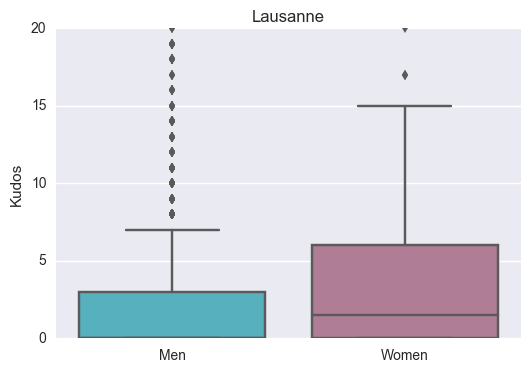

In [57]:
ax = sns.boxplot(data = [efforts_athletes_activities[m].kudos_count, efforts_athletes_activities[f].kudos_count], color=f_color)
mybox = ax.artists[0]
mybox.set_facecolor(m_color)
plt.legend()
plt.ylim(0, 20)
plt.title(location)
ax.set_xticklabels(['Men', 'Women'])
plt.ylabel('Kudos')
plt.savefig('./images/kudos_sex.{0}.png'.format(location))


In [21]:
sp.ttest_ind(efforts_athletes_activities[m].kudos_count.dropna(), efforts_athletes_activities[f].kudos_count.dropna())

Ttest_indResult(statistic=-2.9258382904923854, pvalue=0.0034523056838625488)

Differences with premium users?

In [22]:
premuim = efforts_athletes_activities.premium == True

In [23]:
p_color = sns.color_palette()[3]
non_p_color = sns.color_palette()[4]

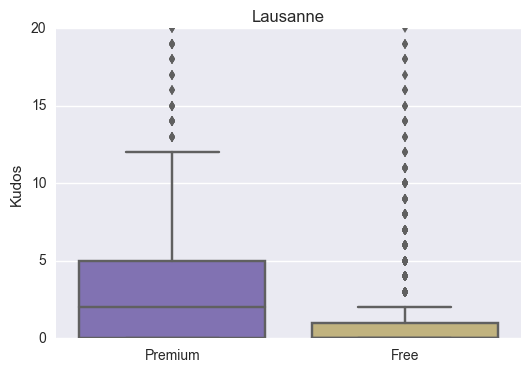

In [59]:
ax = sns.boxplot(data = [efforts_athletes_activities[premuim].kudos_count, efforts_athletes_activities[~premuim].kudos_count], color=non_p_color)
mybox = ax.artists[0]
mybox.set_facecolor(p_color)
plt.ylim(0, 20)
plt.title(location)
ax.set_xticklabels(['Premium', 'Free'])
plt.ylabel('Kudos')
plt.savefig('./images/kudos_premium.{0}.png'.format(location))


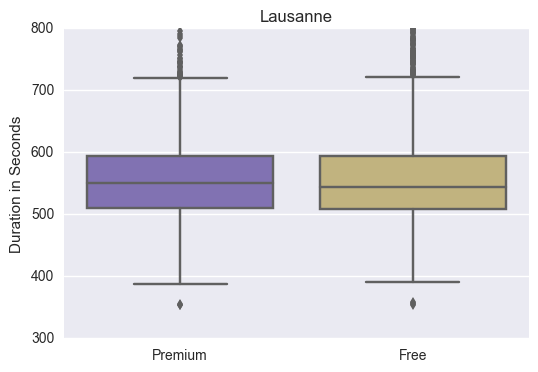

In [58]:
ax = sns.boxplot(data = [efforts_athletes_activities[premuim].moving_time_x, efforts_athletes_activities[~premuim].moving_time_x], color=non_p_color)
mybox = ax.artists[0]
mybox.set_facecolor(p_color)
plt.ylim(300, 800)
plt.title('Lausanne')
ax.set_xticklabels(['Premium', 'Free'])
plt.ylabel('Duration in Seconds')
plt.savefig('./images/duration_premium.{0}.png'.format(location))


In [26]:
sp.ttest_ind(efforts_athletes_activities[premuim].moving_time_x, efforts_athletes_activities[~premuim].moving_time_x)

Ttest_indResult(statistic=0.2126164967919397, pvalue=0.83163539269883446)